In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: P0886090801PNS003SRSPEC0016.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.973e-03 +/- 5.863e-04 (68.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-5
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.761e+04 sec
 Using fit statistic: chi
 Using Background File                P0886090801PNS003BGSPEC0016.FTZ
  Background Exposure Time: 1.761e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY2.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886090801PNS003SRCARF0016.FTZ



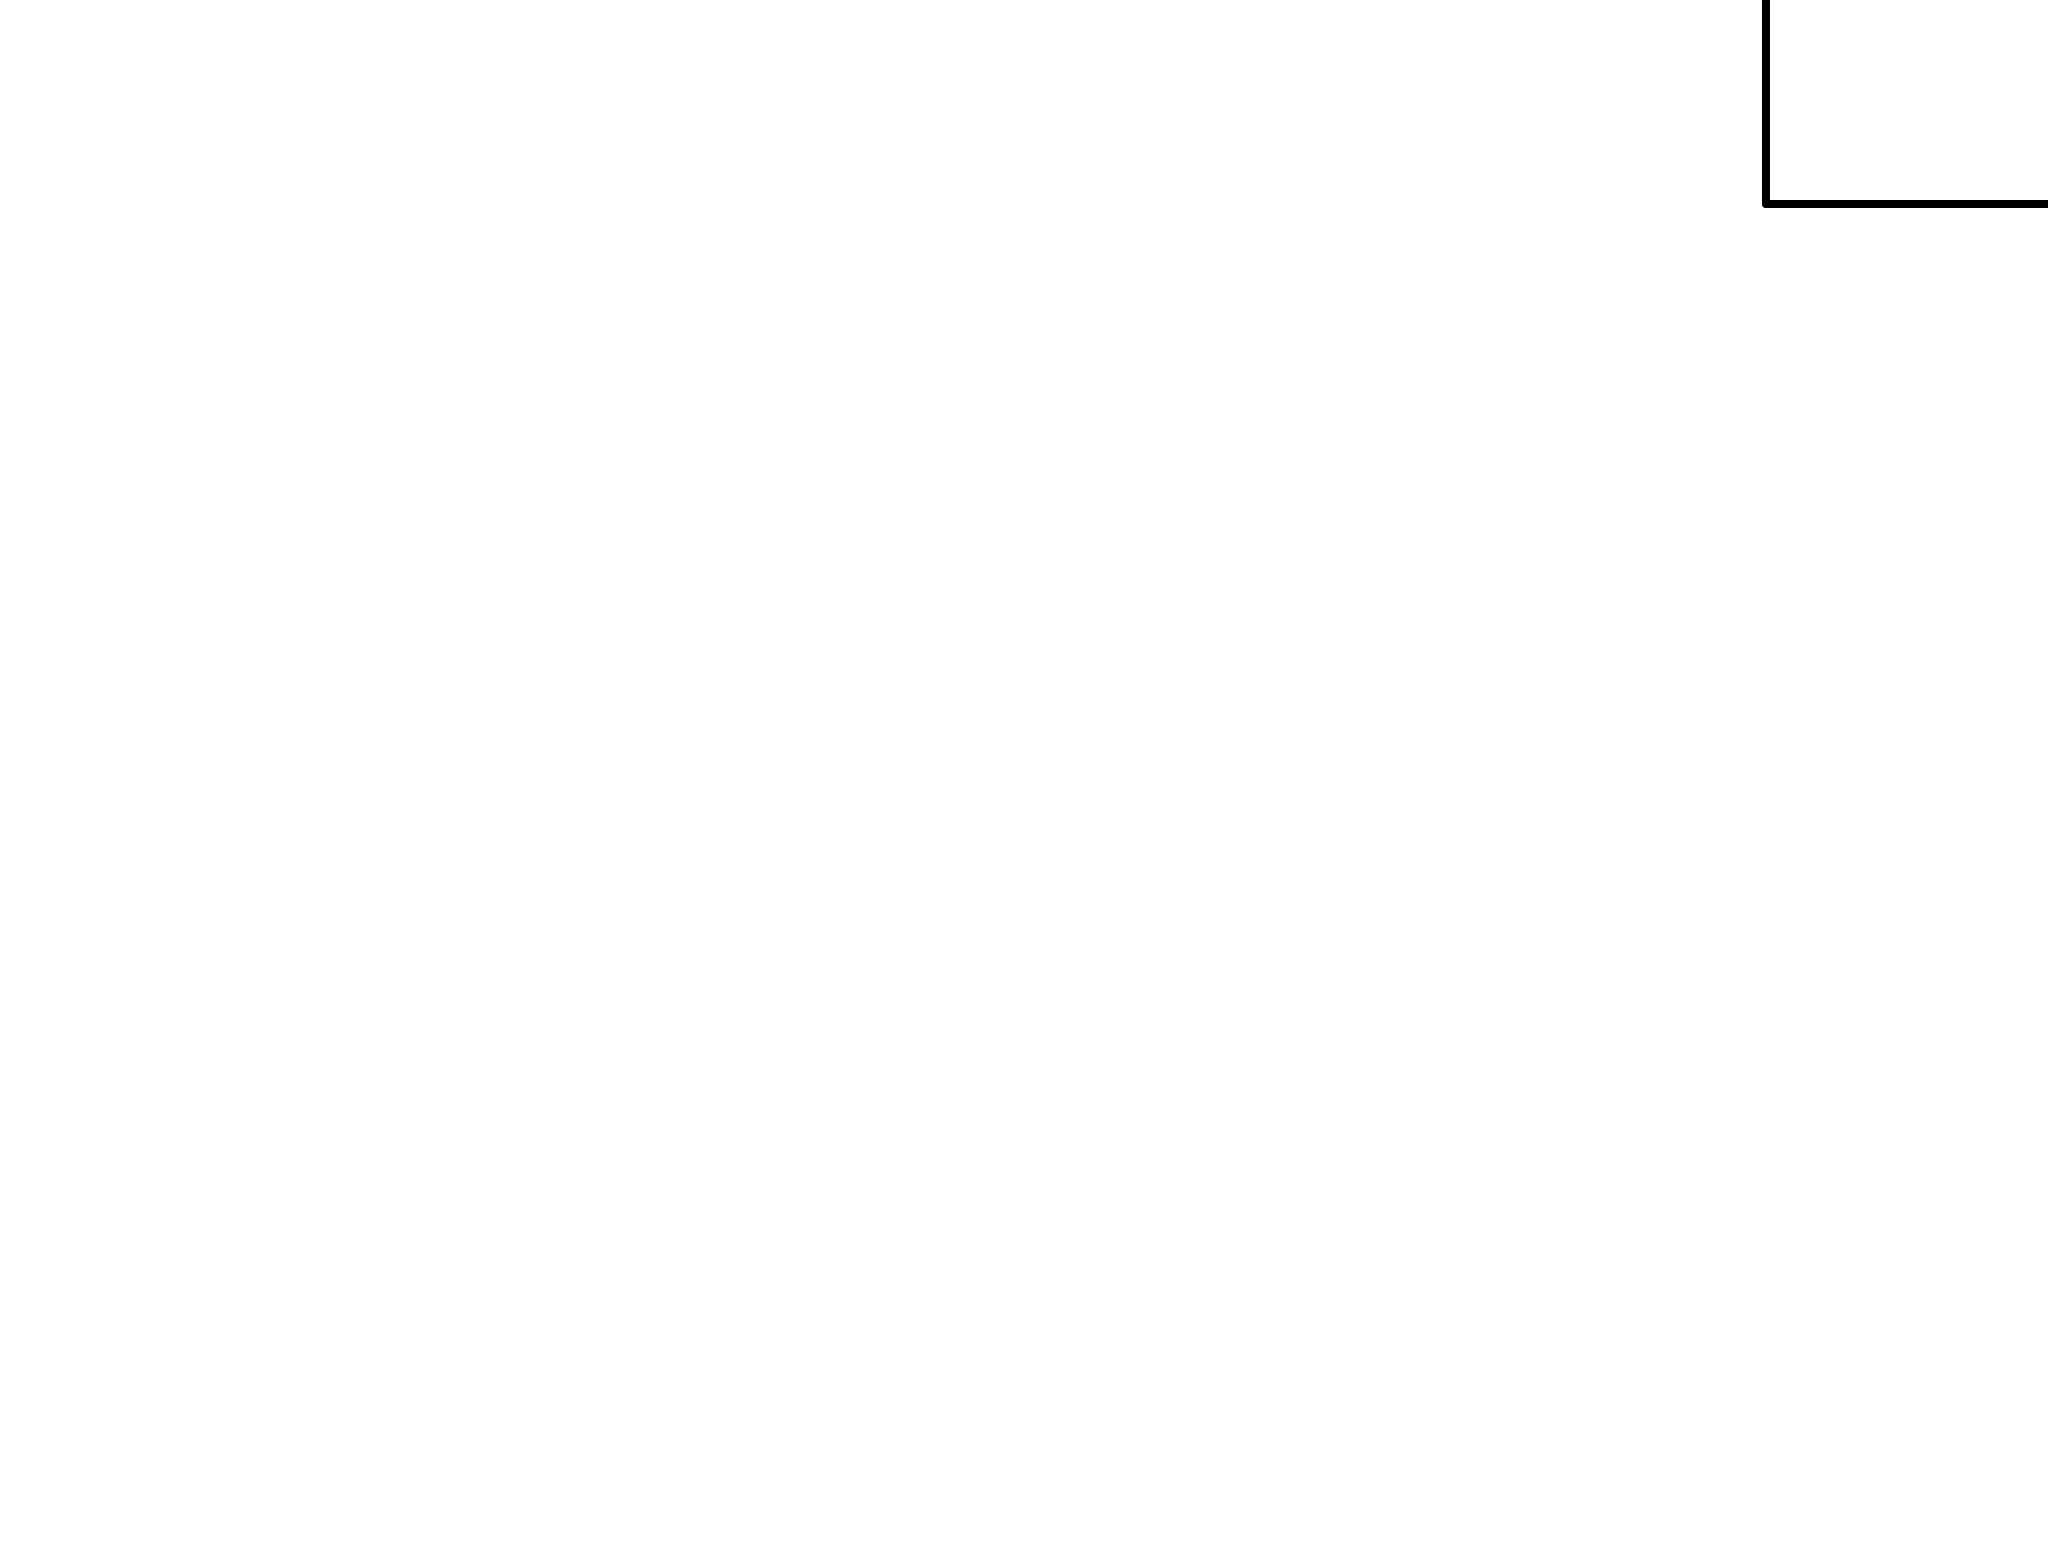

In [3]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.002")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.764620e+11     using 5 bins.



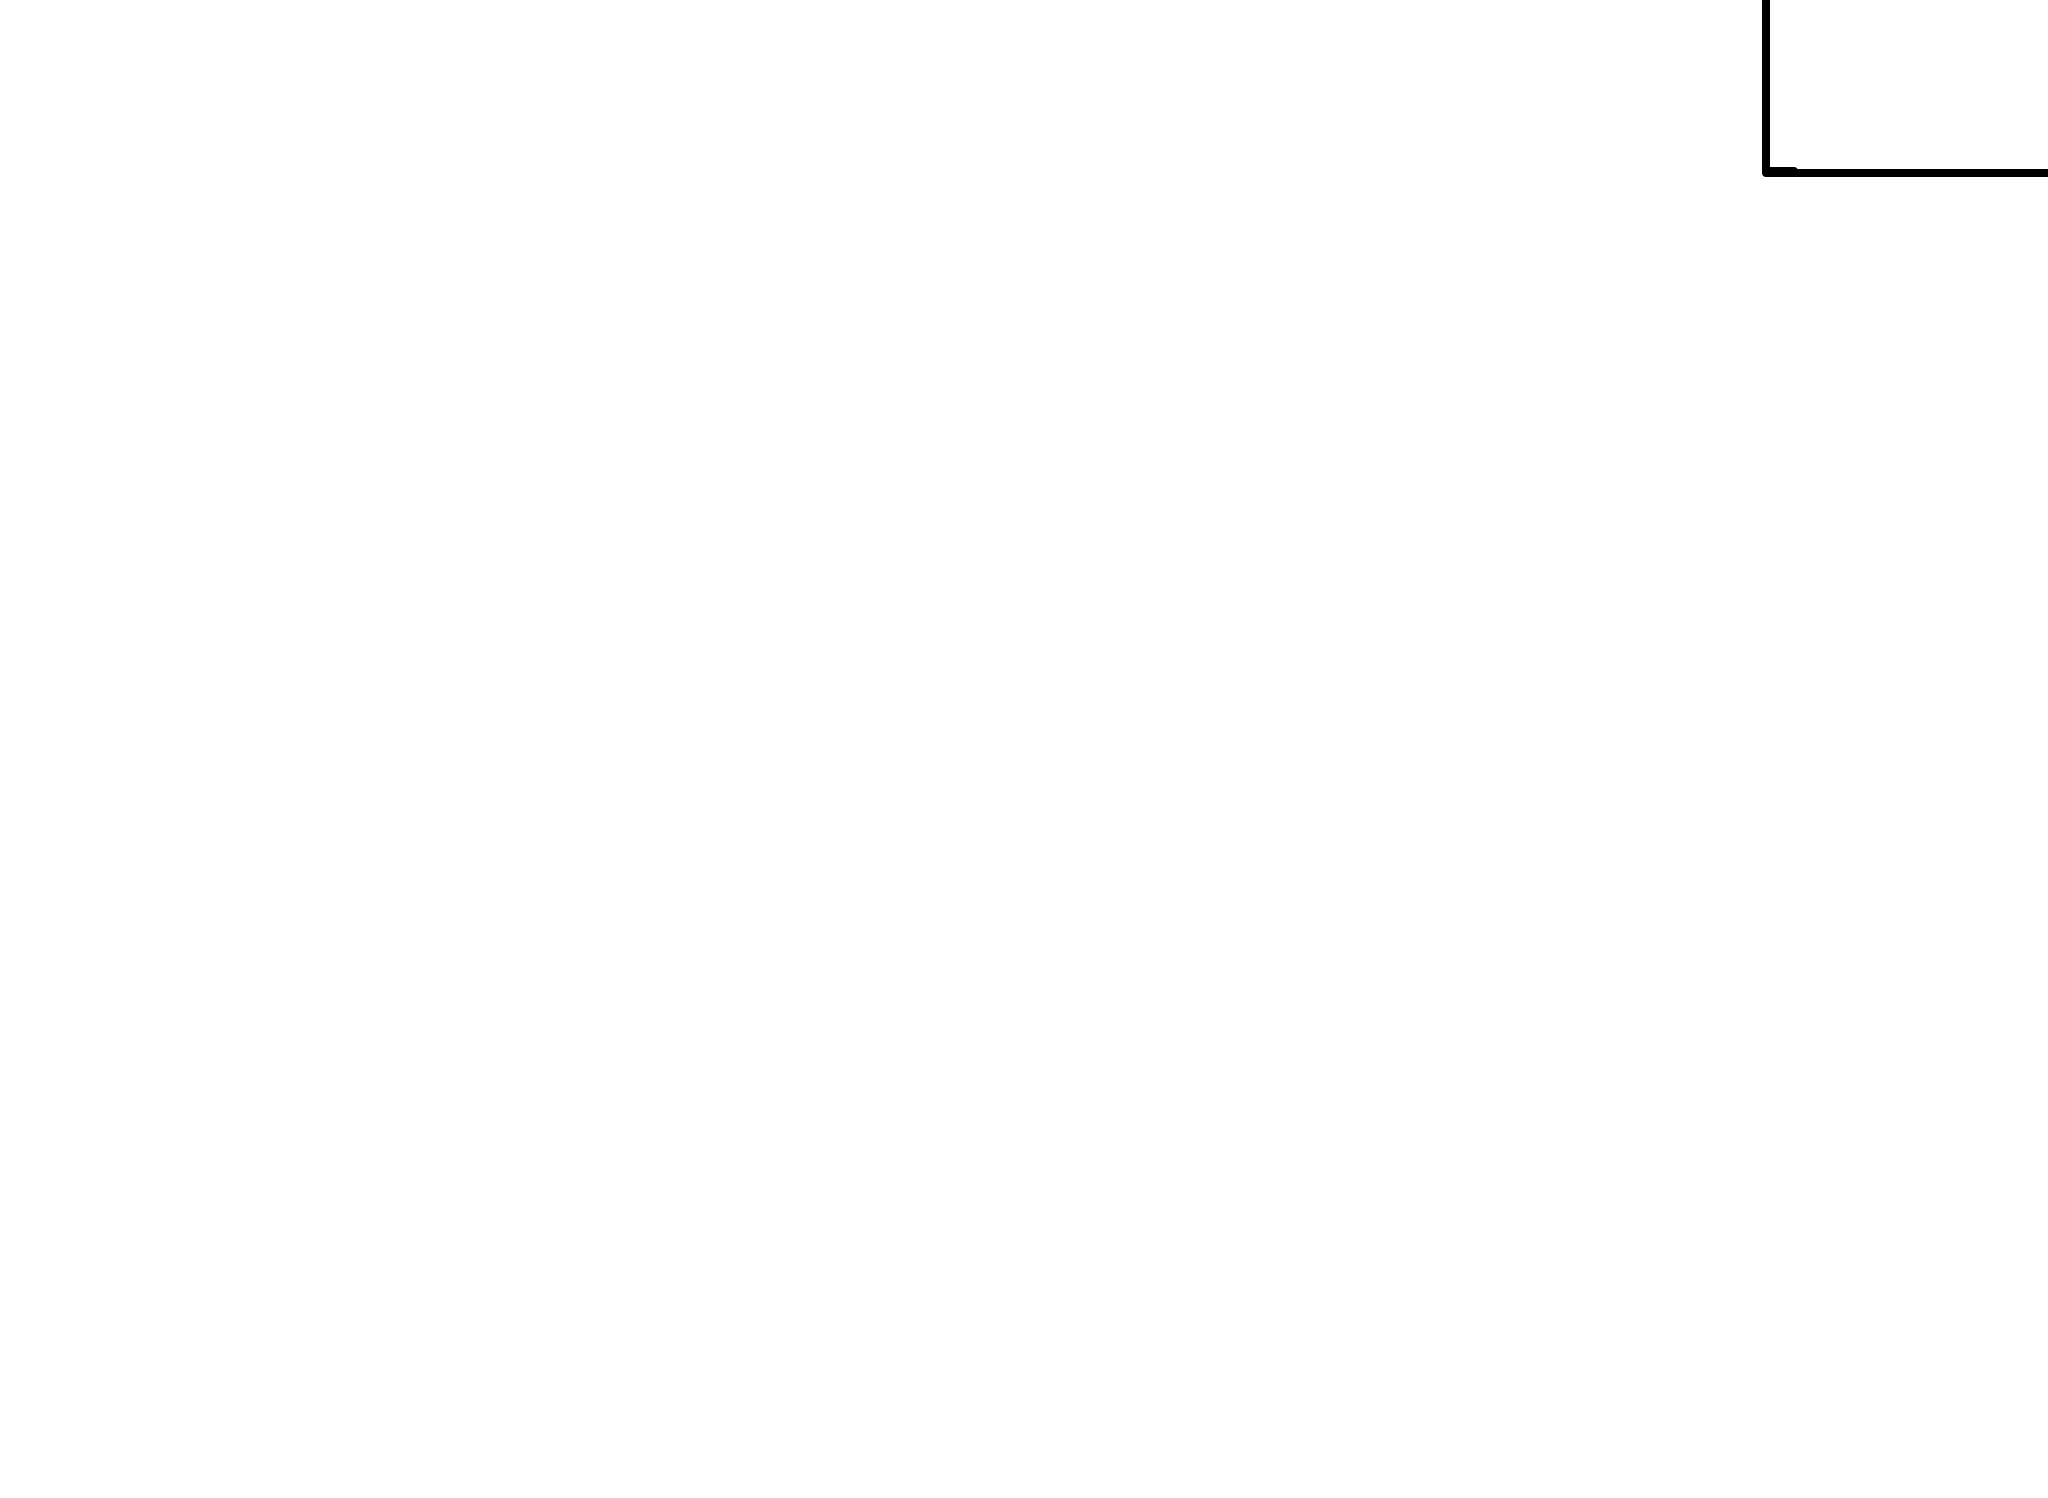

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
     1            0     0.877497    (-0.215215,0.662282)
 Parameter   Confidence Range (2.706)
     2     0.182685      1.56342    (-0.60301,0.777729)


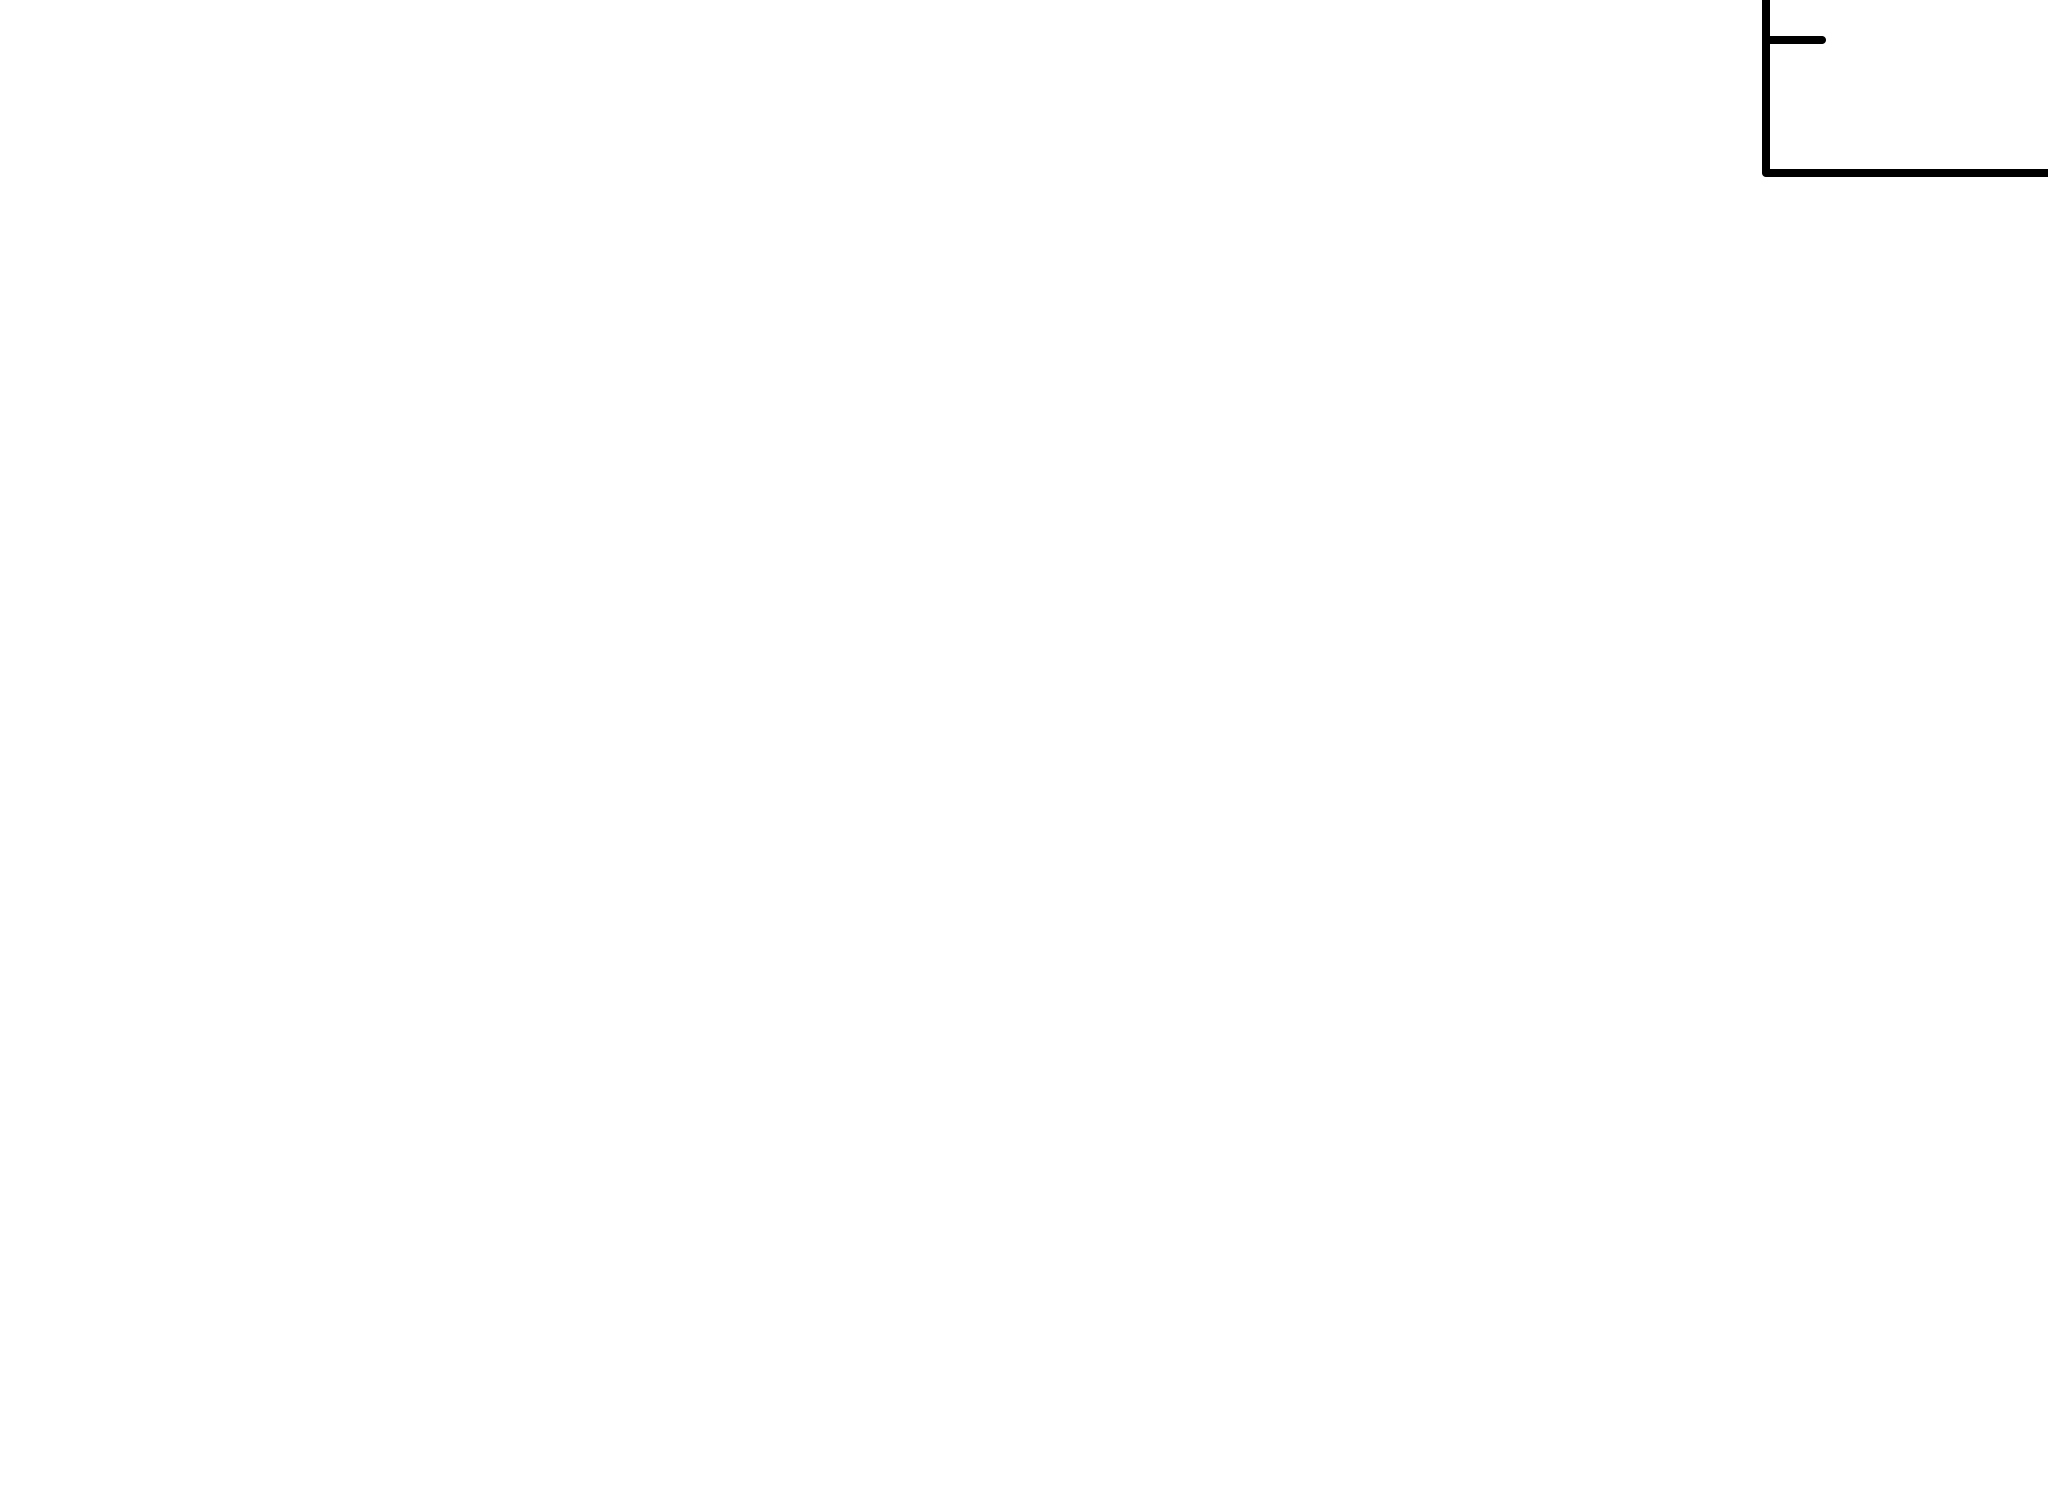


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.251147e+10     using 5 bins.

Test statistic : Chi-Squared              3.251147e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.46978      0.0914984    -1      0.778541       13.6500   2.79159e-05
4.39841      62871        -1      0.420650       41.0807   2.84911e-05
4.09794      20888.1      -1      0.408403       66.7566   3.27423e-05
3.9

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.179396      1.20522    (-0.229554,0.79627)



***XSPEC Error:  No variable parameters for fit 

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.88038      0.00313969    1      0.419453       123.800   3.92199e-05
3.8797       2064.7        1      0.419423       124.795   3.92219e-05
3.87948      2913.38       1      0.419381       125.268   3.92249e-05
3.87934      3285.38       1      0.419333       125.524   3.92282e-05
3.87923      3460.12       1      0.419283       125.643   3.92317e-05
3.87911      3513.7        1      0.419232       125.742   3.92353e-05
3.87899      3548.7        1      0.419181       125.819   3.92388e-05
3.87888      3563.58       1      0.419129       125.886   3.92424e-05
3.87876      3570.37       1      0.419078       125.958   3.92461e-05
3.87864      3581.02       1      0.419027       126.006   3.92497e-05
3.87853      3570.54       1      0.418976       126.080   3.92533e-05
3.87841      3583.23       1      0.418924       126.123   3.925


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.977229e+09     using 5 bins.

Test statistic : Chi-Squared              8.977229e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
21.7225      3.249        -3      0.265613       6.12633   2.1

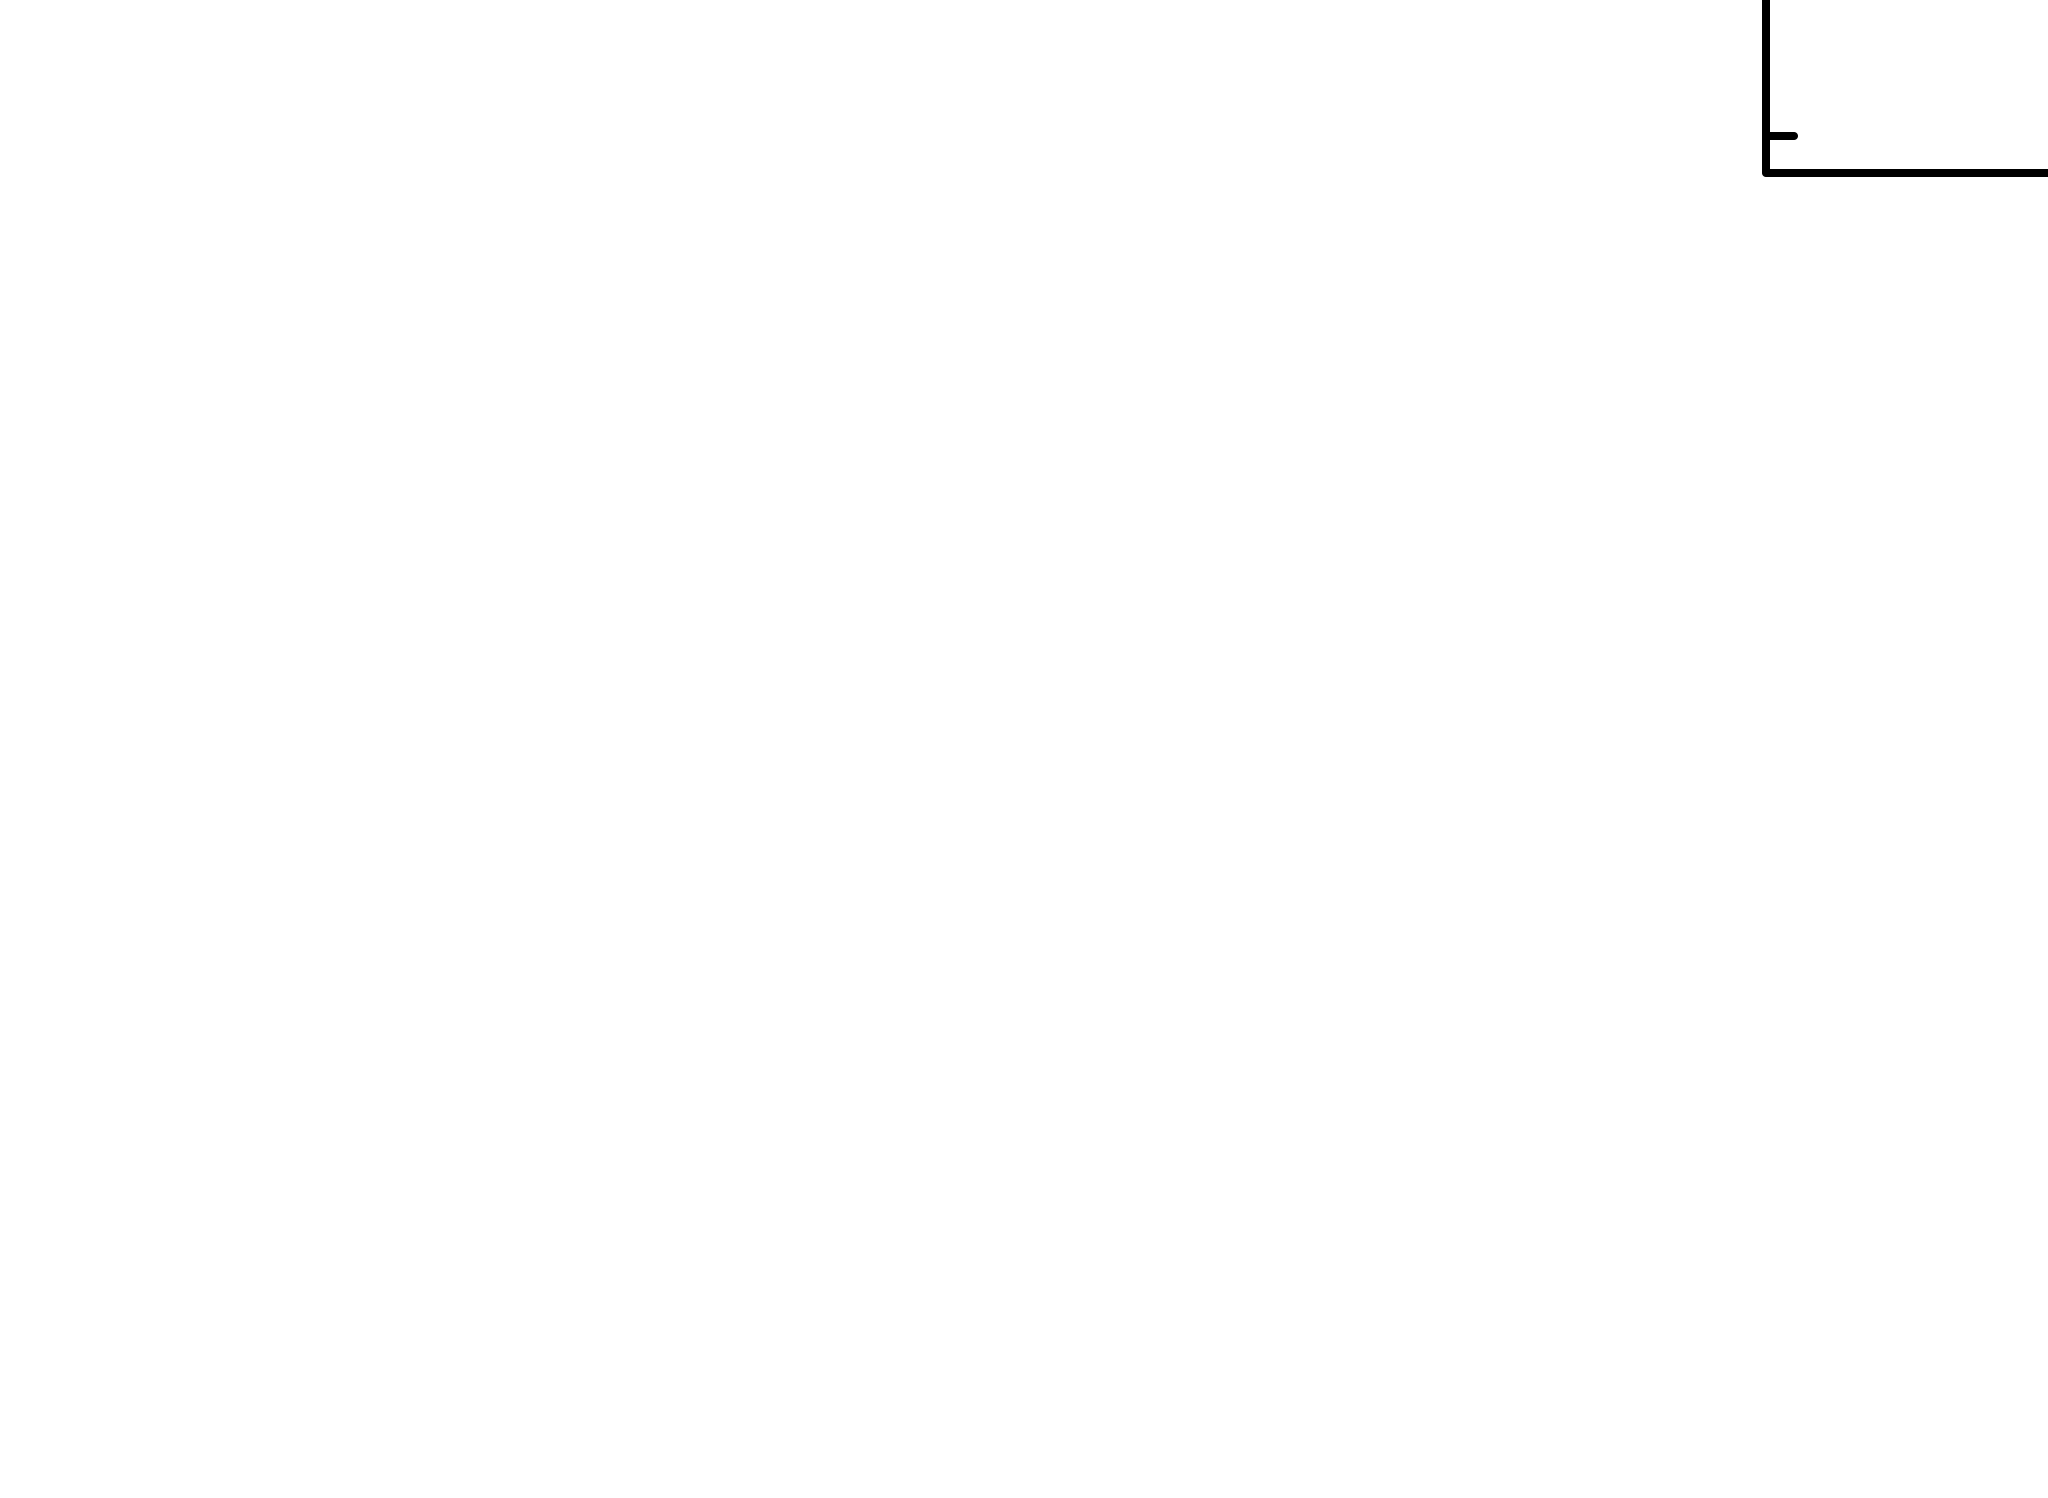

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
# Fit.error("1")
# Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], np.inf, np.inf
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.862184e+11     using 5 bins.

Test statistic : Chi-Squared              6.862184e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
19.807       1.08334       0      0.372294       3.02501   5.58207e-06
17.4685      194366        0      0.171181       2.96125   5.32058e-06
16.0106      245533       -1     0.0536659       2.63284   3.63867e-06
9.49

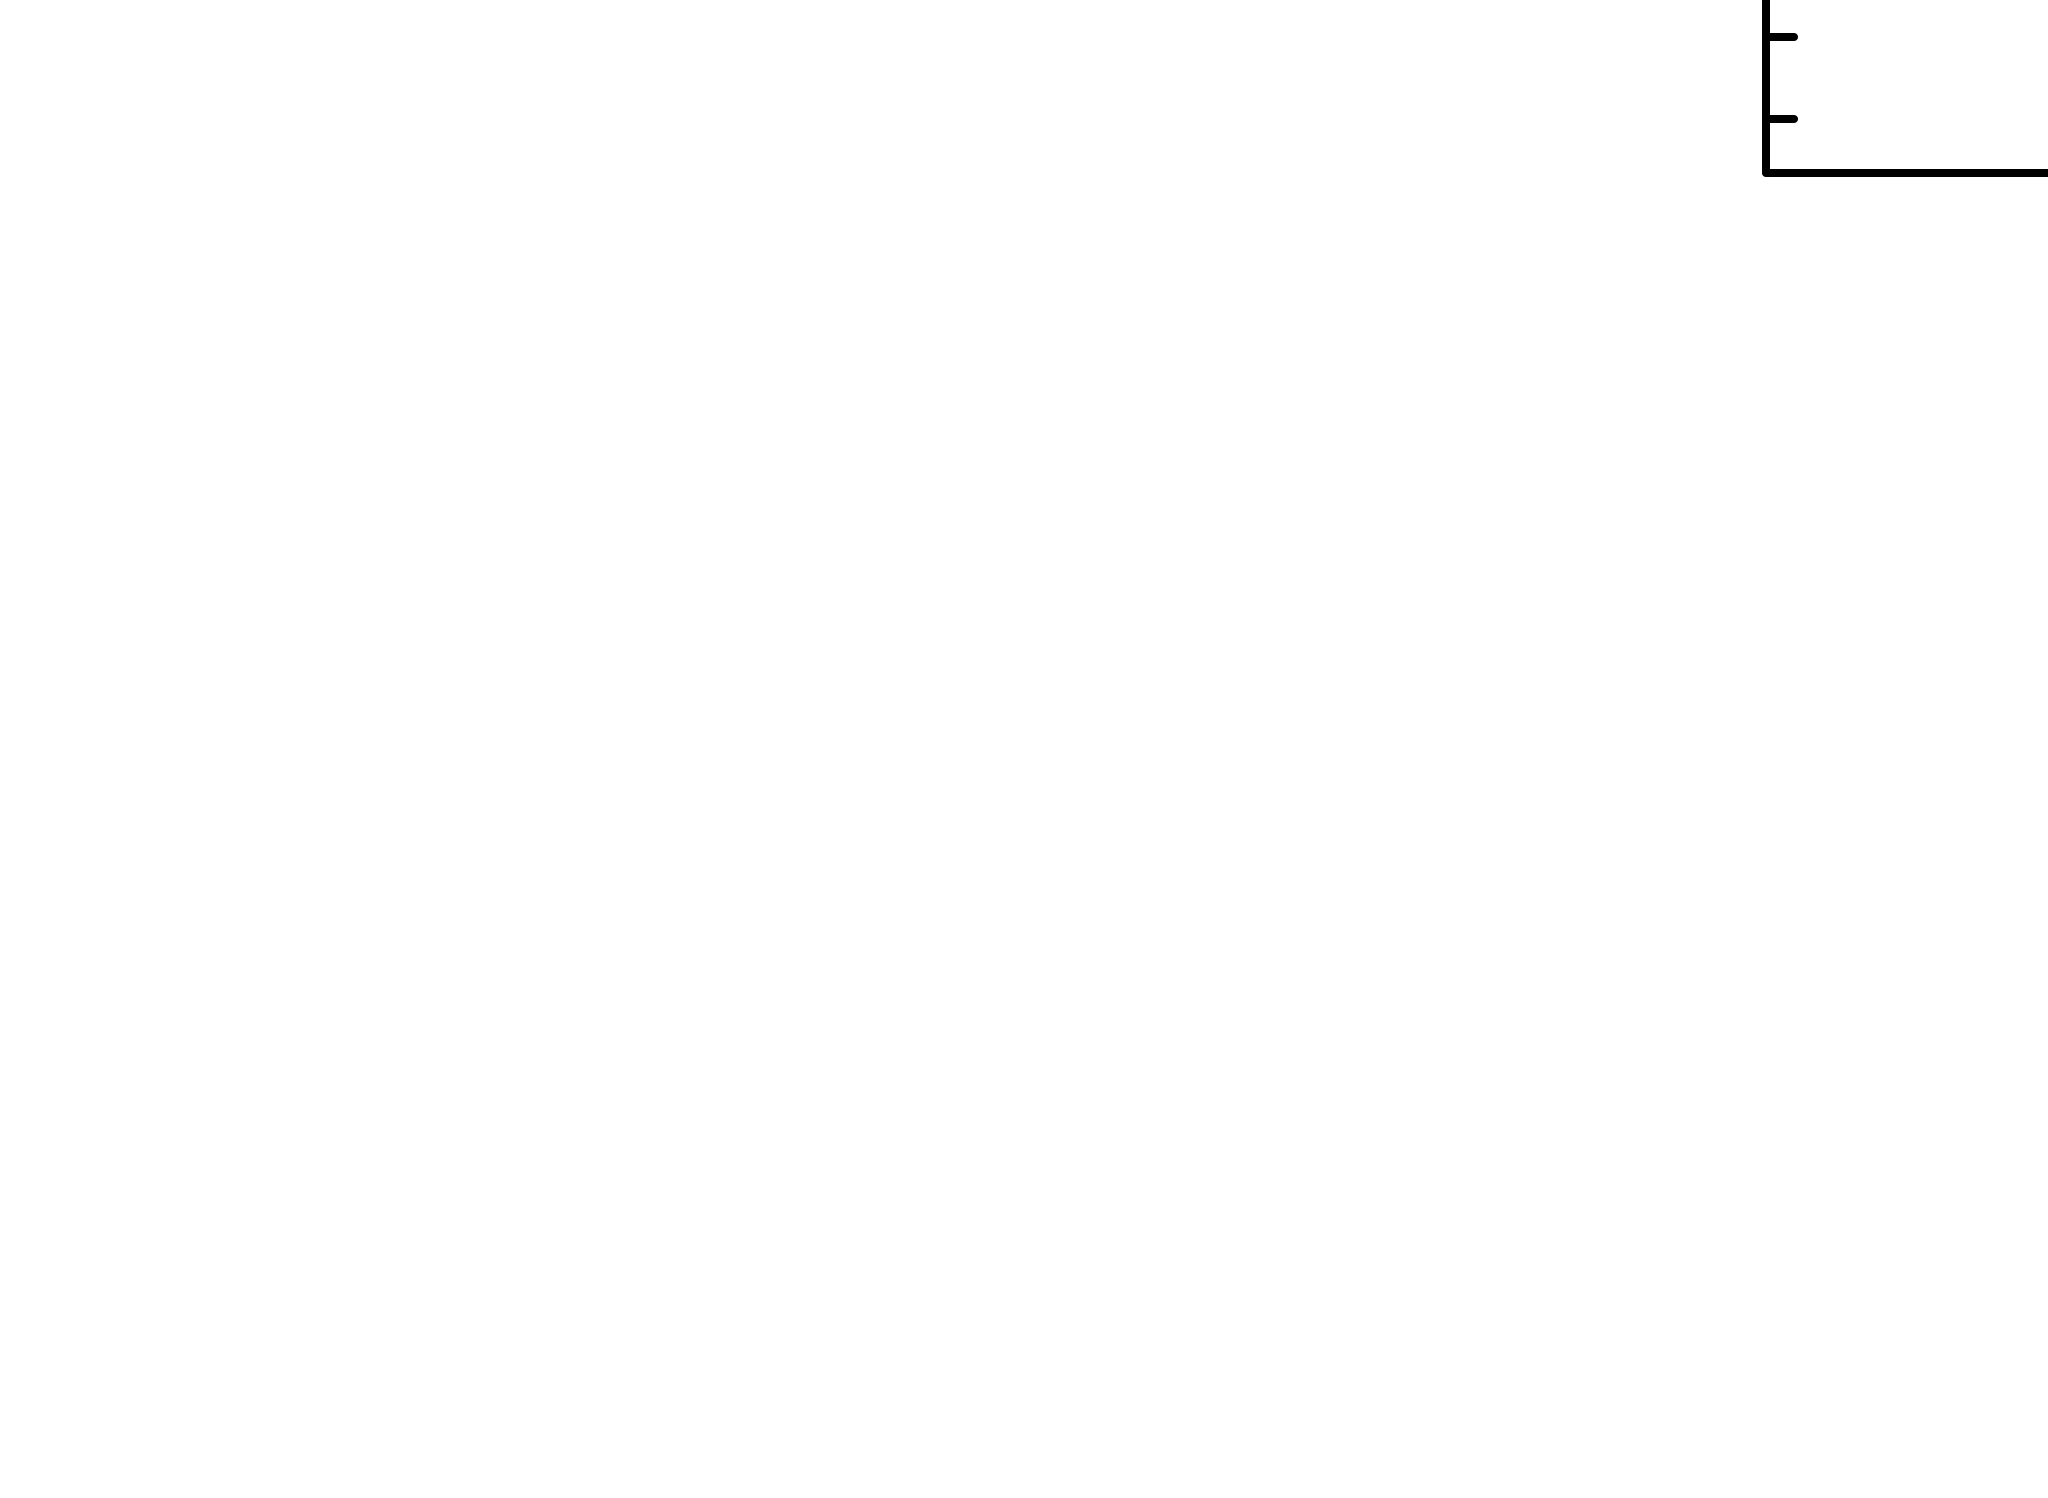

In [10]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
2.07063      1.0782        1   2.95492e-08       1.22761   1.52202e-06
 Variances and Principal Axes
                 1        2        3  
 4.8597E-14| -0.0000  -0.0000   1.0000  
 1.2626E-02|  0.9168   0.3992   0.0000  
 9.3478E-02| -0.3992   0.9168   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   2.551e-02  -2.960e-02  -2.446e-08
  -2.960e-02   8.059e-02   1.181e-07
  -2.446e-08   1.181e-07   2.462e-13
------------------------------------

Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    2.95492E-08  +/-  0.159730     
   2    2   bbody      kT         keV      1.22761      +/-  0.283885     
   3    2   bbody      norm                1.52202E-06  +/-  4.96217E-07  

In [12]:
np.savetxt('../spec39_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.381e-05 photons (1.2606e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
#plx = 0.45
d_kpc = 8
F_x = 1.3377*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.0240476939184128e+33


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.0103201839086


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.3851694279993309
